In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from tqdm import tqdm
from scipy.stats import pearsonr
from seaborn import heatmap

In [208]:
from sklearn.linear_model import LinearRegression
df = pd.read_csv('evraz_data.csv', sep=';', decimal=",")
y_cols = ['химшлак последний Al2O3', 'химшлак последний CaO', 
          'химшлак последний FeO', 'химшлак последний MgO',
          'химшлак последний MnO', 'химшлак последний R',
          'химшлак последний SiO2']
df

,Unnamed: 0,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,7036,г68386398<;,2071-04-21 19:50:00,Э90ХАФ,Р65,41.0,42.333333,23.200000,42.166667,3.380628,...,0.10,2.6,22.2,7.0,60.6,0.4,6.2,0.06,2.7,22.8
7037,7037,г68386398<<,2071-04-21 20:45:00,Э90ХАФ,Р65,36.0,46.533333,16.183333,46.383333,NaN,...,0.10,2.2,24.5,4.9,53.0,0.5,11.1,0.25,2.4,22.3
7038,7038,г68386398<=,2071-04-21 21:34:00,Э90ХАФ,Р65,42.0,47.566667,23.016667,47.100000,2.263004,...,0.13,2.7,20.0,5.2,55.4,0.7,6.7,0.13,2.2,25.0
7039,7039,г68386398<>,2071-04-21 22:25:00,Э90ХАФ,Р65,45.0,46.033333,17.533333,45.683333,3.000000,...,0.18,2.1,24.5,4.9,55.1,0.4,8.9,0.16,2.1,26.0


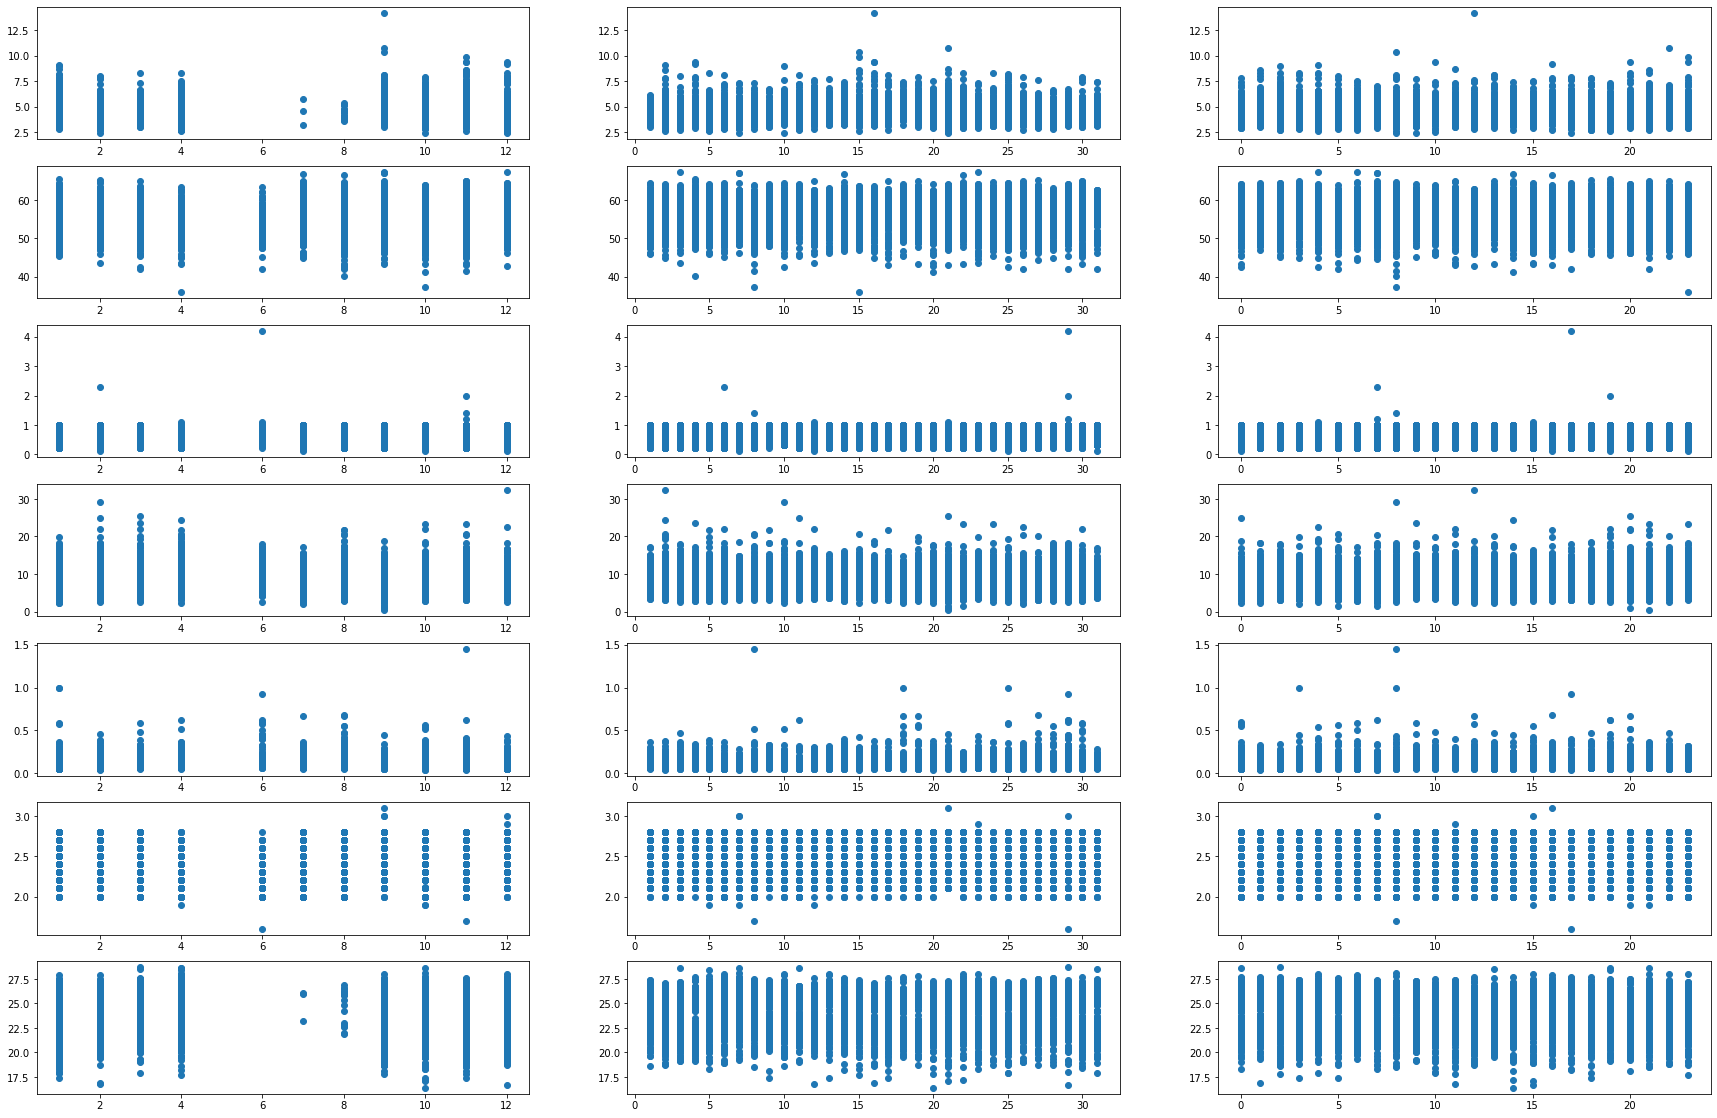

In [209]:
df_month = [d.month for d in pd.to_datetime(df['DT'])]
df_day = [d.day for d in pd.to_datetime(df['DT'])]
df_hour = [d.hour for d in pd.to_datetime(df['DT'])]

fig, axs = plt.subplots(7, 3, figsize=(30, 20))
for i in range(7):
    axs[i, 0].scatter(df_month, df[y_cols[i]])
    axs[i, 1].scatter(df_day, df[y_cols[i]])
    axs[i, 2].scatter(df_hour, df[y_cols[i]])
## Месяц, день и час не имеют четких зависимостей с y

In [210]:
# Убираем столбцы с NaN > 50%

exclude_columns = []
for column in df.columns:
    nas = df[column].isna().sum()
    print(column, nas)
    if nas > len(df)//2:
        exclude_columns.append(column)
    
df = df.drop(columns=exclude_columns)
print('Убраны столбцы:', exclude_columns)
print(df.shape)


Unnamed: 0 0
nplv 0
DT 0
МАРКА 0
ПРОФИЛЬ 0
t вып-обр 597
t обработка 601
t под током 601
t продувка 597
ПСН гр. 1792
чист расход C 606
чист расход Cr 1158
чист расход Mn 610
чист расход Si 610
чист расход V 863
температура первая 605
температура последняя 605
Ar (интенс.) 615
N2 (интенс.) 5652
эл. энергия (интенс.) 601
произв жидкая сталь 597
произв количество обработок 597
произв  количество плавок 597
произв количество плавок (цел) 597
расход газ Ar 615
расход газ  N2 5652
расход C пров. 6317
сыпуч известь РП 2271
сыпуч кварцит 7028
сыпуч кокс пыль УСТК 619
сыпуч  кокс. мелочь (сух.) 7034
сыпуч  кокс. мелочь КМ1 734
сыпуч  шпат плав. 1131
ферспл CaC2 797
ферспл FeMo 7008
ферспл FeSi-75 7036
ферспл FeV азот. 6658
ферспл  FeV-80 862
ферспл  Mn5Si65Al0.5 641
ферспл  Ni H1 пласт. 6959
ферспл SiMn18 643
ферспл  ферванит 6024
ферспл  фх850А 1158
эл. энергия 601
химсталь первый Al_1 597
химсталь первый C_1 597
химсталь первый Cr_1 597
химсталь первый Cu_1 597
химсталь первый Mn_1 597
химста

In [211]:
# Убираем столбцы с одним значением и со 100% уникальностью
exclude_columns = []
for column in df.columns:
    nunique = df[column].nunique()
    print(column, nunique)
    if nunique == 1 or nunique == len(df):
        exclude_columns.append(column)

df = df.drop(columns=exclude_columns)
print("Убраны столбцы:", exclude_columns)
print(df.shape)

Unnamed: 0 7041
nplv 7041
DT 7041
МАРКА 18
ПРОФИЛЬ 18
t вып-обр 82
t обработка 816
t под током 1155
t продувка 831
ПСН гр. 4296
чист расход C 6243
чист расход Cr 3115
чист расход Mn 6320
чист расход Si 6265
чист расход V 4645
температура первая 154
температура последняя 109
Ar (интенс.) 6423
эл. энергия (интенс.) 6362
произв жидкая сталь 174
произв количество обработок 3
произв  количество плавок 1
произв количество плавок (цел) 1
расход газ Ar 5543
сыпуч известь РП 433
сыпуч кокс пыль УСТК 306
сыпуч  кокс. мелочь КМ1 665
сыпуч  шпат плав. 176
ферспл CaC2 7
ферспл  FeV-80 659
ферспл  Mn5Si65Al0.5 364
ферспл SiMn18 494
ферспл  фх850А 362
эл. энергия 3132
химсталь первый Al_1 6
химсталь первый C_1 417
химсталь первый Cr_1 371
химсталь первый Cu_1 101
химсталь первый Mn_1 404
химсталь первый Mo_1 24
химсталь первый N_1 18
химсталь первый Ni_1 115
химсталь первый P_1 18
химсталь первый S_1 34
химсталь первый Si_1 384
химсталь первый Ti_1 7
химсталь первый V_1 28
химсталь последний Al 20
хи

In [212]:
df.groupby(by='произв количество обработок', as_index=False).agg({'произв количество обработок': pd.Series.count})

,произв количество обработок
0,6391.0
1,48.0
2,5.0


In [213]:
df = df.drop(columns='произв количество обработок')

In [214]:
df.groupby(by='МАРКА').agg({'МАРКА': pd.Series.count})

,МАРКА
МАРКА,
09Г2С,4
900А,54
G2HH,34
R260,35
R350HT,54
НХ,7
С255,2
С345,3
С355,1


In [215]:
df['МАРКА'][~df['МАРКА'].isin(['Э76ХФ', 'Э90ХАФ'])] = 'другое'  
df.groupby(by='МАРКА').agg({'МАРКА': pd.Series.count})

<ipython-input-215-cf8c135ed3cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['МАРКА'][~df['МАРКА'].isin(['Э76ХФ', 'Э90ХАФ'])] = 'другое'


,МАРКА
МАРКА,
Э76ХФ,4953
Э90ХАФ,1384
другое,704


In [216]:
df.groupby(by='ПРОФИЛЬ').agg({'ПРОФИЛЬ': pd.Series.count})

,ПРОФИЛЬ
ПРОФИЛЬ,
136 RE,17
54E1,10
60E1,95
60E2,1
UIC54,54
НЕТ,7
НЛЗ 300х365,1
ОР50,6
ОР65,221


In [217]:
# Отделим кат признаки (в конце ноутбука в ключим обратно)
cat_columns = ['МАРКА', 'ПРОФИЛЬ']
cat_X = df[cat_columns]
df = df.drop(columns=cat_columns)

In [218]:
# Удаление строк с NaN > 33%
row_indexes_to_exclude = []

number_of_columns_in_dataframe = len(df.columns)
for index, row in df.iterrows():
    NaN_count = row.isna().sum()
    if NaN_count > number_of_columns_in_dataframe*(1/3):
        row_indexes_to_exclude.append(index)

cat_X = cat_X.drop(df.index[row_indexes_to_exclude])
df = df.drop(df.index[row_indexes_to_exclude])
print(df.shape)

(6443, 67)


In [219]:
for column in y_cols:
    column = column.replace('последний', 'первый') + '_1'
    nas = df[column].isna().sum()
    print(column, nas)
# Много пропусков в колонках 'химшлак последний Al2O3' и 'химшлак последний SiO2'
# Сделаем из них доп кат переменные
al2o3_is_na_col = df['химшлак первый Al2O3_1'].isna().astype(int)
al2o3_is_na_col.name = 'химшлак первый Al2O3_1 == NaN'
sio2_is_na_col = df['химшлак первый SiO2_1'].isna().astype(int)
sio2_is_na_col.name = 'химшлак первый SiO2_1 == NaN'

химшлак первый Al2O3_1 1701
химшлак первый CaO_1 0
химшлак первый FeO_1 0
химшлак первый MgO_1 1
химшлак первый MnO_1 0
химшлак первый R_1 0
химшлак первый SiO2_1 1701


In [220]:
# Заполняем NaN'ы регрессией

columns_to_fill = []
for column in df.columns:
    nas = df[column].isna().sum()
    if nas != 0:
        print(column, nas)
    if nas/df.shape[0] < 0.05:
        if nas != 0:
            df[column].fillna(df[column].median(), inplace=True)
    else:
        columns_to_fill.append(column)

for column in columns_to_fill:
    rows_no_nans = df[~df[column].isna()]
    rows_with_nans = df[df[column].isna()].copy()
    print("column:", column, rows_no_nans.shape, rows_with_nans.shape)

    lr = LinearRegression()
    lr.fit(rows_no_nans.drop(columns=columns_to_fill), rows_no_nans[column])
    df.fillna(pd.DataFrame(
        lr.predict(rows_with_nans.drop(columns=columns_to_fill)),
        columns=[column],
        index=rows_with_nans.index),
              inplace=True)
        

for column in df.columns:
    nas = df[column].isna().sum()
    if nas != 0:
        print(column, nas)


t обработка 4
t под током 3
ПСН гр. 1194
чист расход C 8
чист расход Cr 560
чист расход Mn 12
чист расход Si 12
чист расход V 265
температура первая 7
температура последняя 7
Ar (интенс.) 18
эл. энергия (интенс.) 3
расход газ Ar 18
сыпуч известь РП 1673
сыпуч кокс пыль УСТК 21
сыпуч  кокс. мелочь КМ1 136
сыпуч  шпат плав. 533
ферспл CaC2 199
ферспл  FeV-80 264
ферспл  Mn5Si65Al0.5 43
ферспл SiMn18 45
ферспл  фх850А 560
эл. энергия 3
химсталь первый Mo_1 1
химсталь первый N_1 1
химсталь последний Ca 226
химсталь последний N 2
химшлак первый Al2O3_1 1701
химшлак первый MgO_1 1
химшлак первый SiO2_1 1701
химшлак последний Al2O3 1701
химшлак последний MgO 1
химшлак последний SiO2 1701
column: ПСН гр. (5249, 67) (1194, 67)
column: чист расход Cr (5883, 67) (560, 67)
column: сыпуч известь РП (4770, 67) (1673, 67)
column: сыпуч  шпат плав. (5910, 67) (533, 67)
column: ферспл  фх850А (5883, 67) (560, 67)
column: химшлак первый Al2O3_1 (4742, 67) (1701, 67)
column: химшлак первый SiO2_1 (4742, 

In [221]:
# Удаленние выбросов
isfor = IsolationForest()
isfor.fit(df)
isfor_pred = isfor.predict(df)

df = df[isfor_pred==1]
cat_X = cat_X[isfor_pred==1]
al2o3_is_na_col = al2o3_is_na_col[isfor_pred==1]
sio2_is_na_col = sio2_is_na_col[isfor_pred==1]

print(df.shape)

(6205, 67)


In [222]:
# Отделяем y

X = df.drop(columns=y_cols)
y = df.filter(y_cols)

print(X.shape)
print(y.shape)

(6205, 60)
(6205, 7)


In [223]:
y.describe()

,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000,6205.000000
mean,4.603717,56.420806,0.584061,9.010894,0.121080,2.363678,24.115871
std,0.851554,3.761028,0.211688,3.135953,0.058833,0.223903,2.178519
min,2.400000,35.900000,0.100000,0.300000,0.040000,1.700000,16.400000
25%,4.034684,54.300000,0.400000,6.700000,0.080000,2.200000,22.400000
50%,4.505871,56.800000,0.600000,8.900000,0.110000,2.300000,24.600000
75%,5.100000,58.800000,0.700000,11.200000,0.140000,2.500000,26.000000
max,14.200000,67.500000,2.300000,32.400000,1.450000,3.100000,28.700000


(0.0, 1.0, 0.0, 1.0)

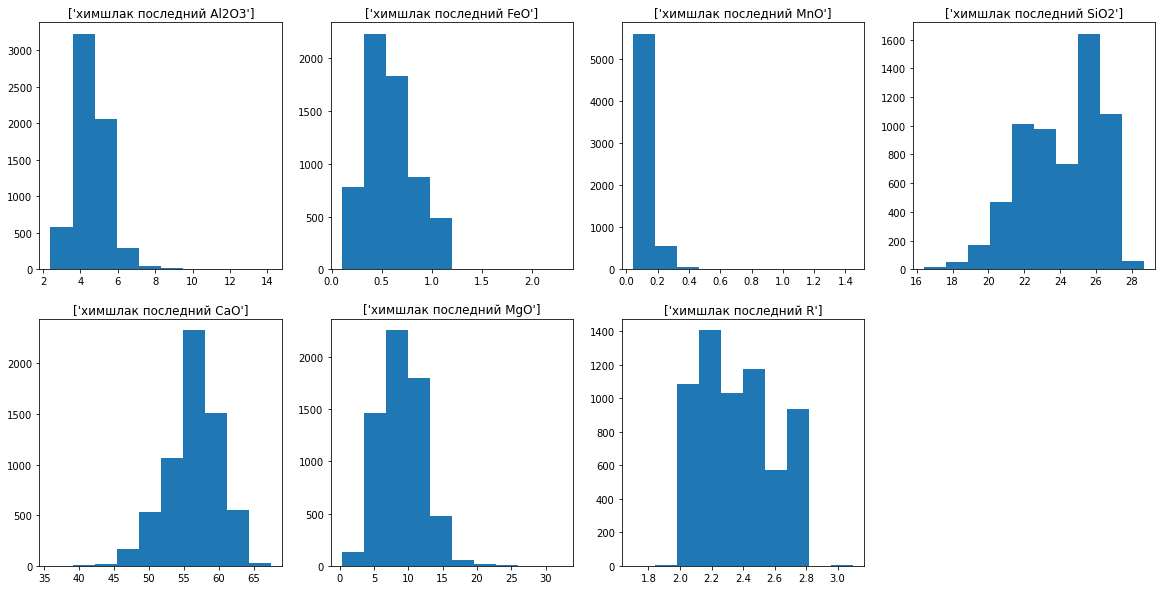

In [224]:
fig, axs = plt.subplots(2, 4, figsize=(20,10))
for i in range(len(y_cols)):
    axs[i%2, i//2].hist(y[y_cols[i]])
    axs[i%2, i//2].set_title([y_cols[i]])
axs[-1,-1].axis('off')

## Поиск линейно зависимых столбцов

In [225]:
# "Линейность" будем оценивать коээфициентом 
# Из полученных оценок можно построить граф и проверить, нет ли цепочек линейной зависимости
# в случае их присутсвия придется более аккуратно удалять столбцы 
cols_checked = [] # Для уменьшение повторов в анализе, линейная зависимость коммутативна
linearity_graph_edges = []
x_cols = list(X.columns)
for x_col_l in tqdm(range(len(x_cols))):
    x_col_l = x_cols[x_col_l]
    cols_checked.append(x_col_l)
    for x_col_r in x_cols:
        if x_col_r in cols_checked:
            continue
        corr, p = pearsonr(X[x_col_l], X[x_col_r])
        # if p < 0.95:
        #     continue
        linearity = abs(corr)
        linearity_graph_edges.append((x_cols.index(x_col_l), 
                            x_cols.index(x_col_r),
                            linearity))
linearity_graph_edges.sort(key = lambda v: v[2])
print(len(linearity_graph_edges))

100%|██████████| 60/60 [00:00<00:00, 69.31it/s]


1770


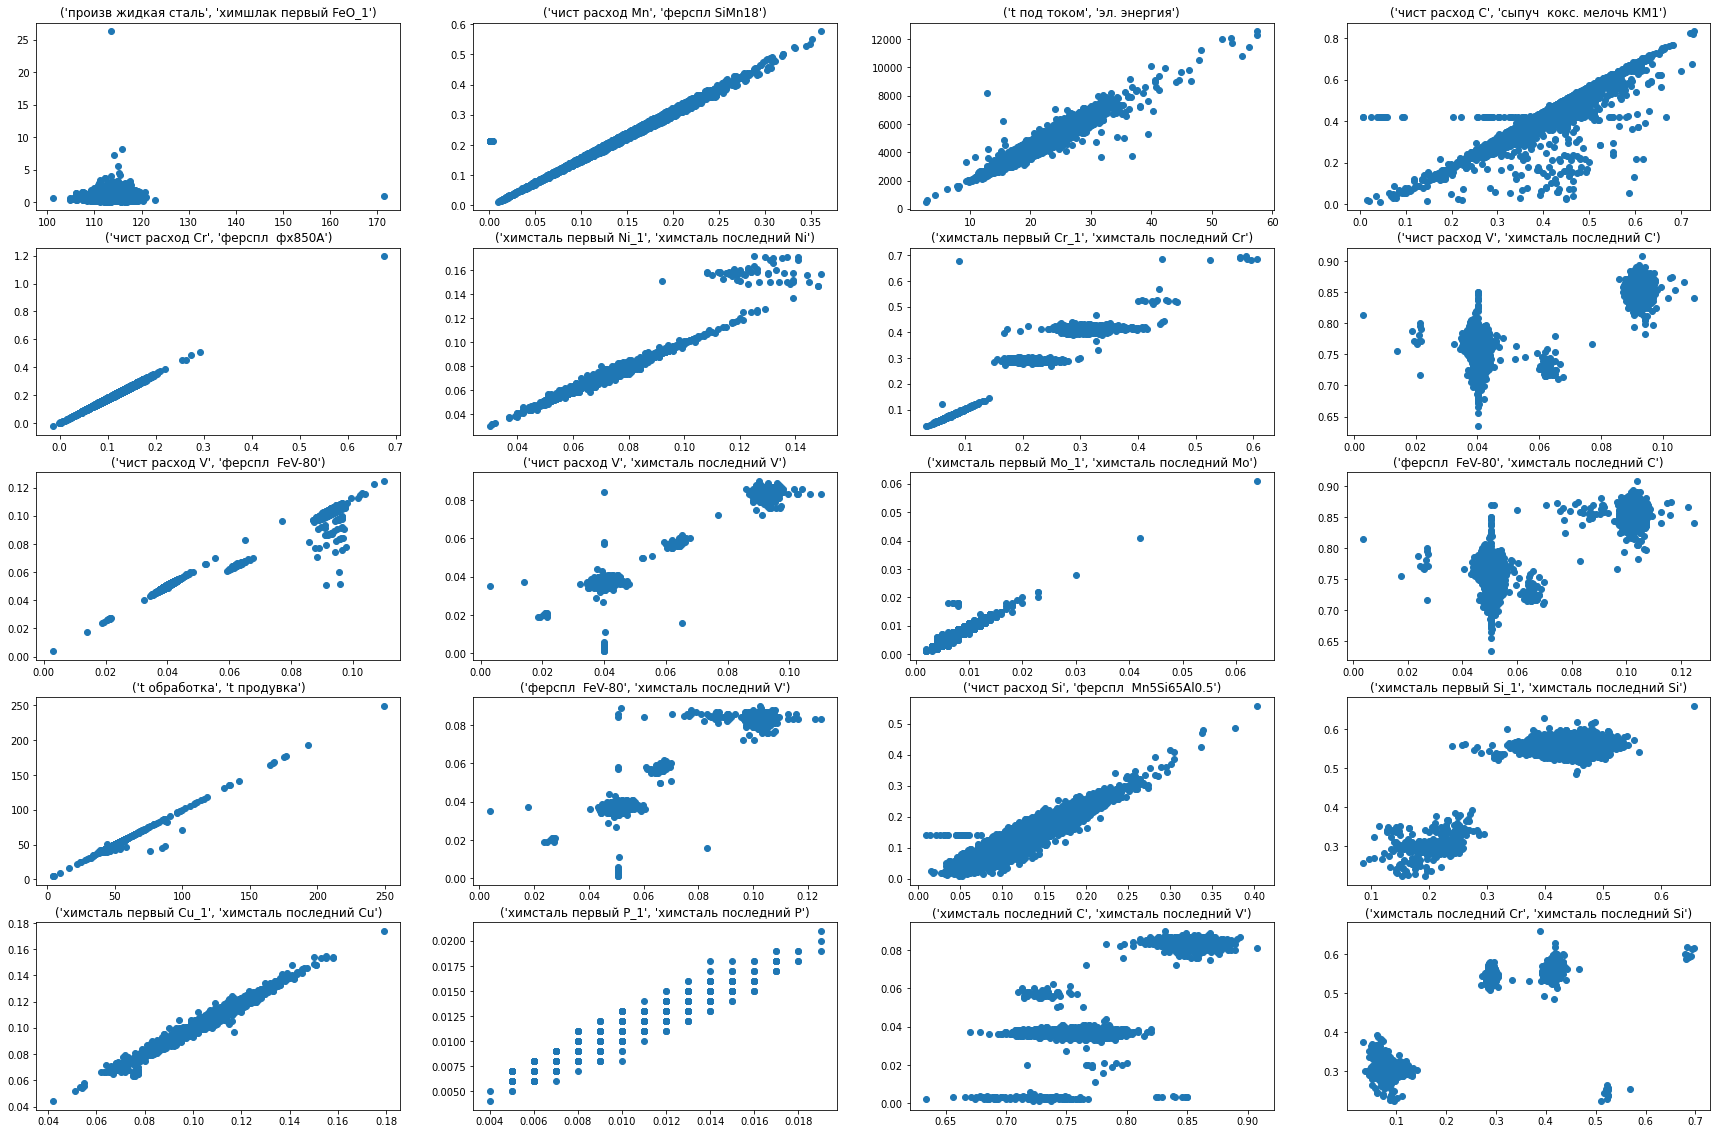

In [226]:
# Можно вывести все остальные графики попарных отношений, но остановимся на топ-20
# У первых шести видна четкая линейность

fig, axs = plt.subplots(5, 4, figsize=(30, 20))
for i in range(20):
    x1, x2, mse_val = linearity_graph_edges[-i]
    axs[i%5, i//5].scatter(X[x_cols[x1]], X[x_cols[x2]])
    axs[i%5, i//5].set_title(f'{x_cols[x1], x_cols[x2]}')

In [227]:
# # Уберем столбцы из топ-5 отношений
# # По графу можно увидеть, что в графе нет цепочек "линейности", что упрощает задачу удаления столбцов        
# G = nx.Graph()
# G.add_weighted_edges_from(linearity_graph_edges[-20:])
# nx.draw(G, with_labels=True)

In [228]:
# Удалим один из столбцов из линейных пар
print(X.shape)
# dropped_columns = [x_cols[edge[0]] for edge in linearity_graph_edges[-7:]]
# Глядя на графики попарных зависимостей, можно выбрать колонки для удаления 
dropped_columns = ['чист расход Mn',
                      'чист расход Cr',
                      'чист расход V',
                      'чист расход Si',
                      'чист расход C',
                      't под током',
                      't обработка',
                      'химсталь первый Cu_1',
                      'химсталь первый Ni_1'
                      ]
X = X.drop(columns=dropped_columns)
print('Удалены признаки:', dropped_columns)
print(X.shape)

(6205, 60)
Удалены признаки: ['чист расход Mn', 'чист расход Cr', 'чист расход V', 'чист расход Si', 'чист расход C', 't под током', 't обработка', 'химсталь первый Cu_1', 'химсталь первый Ni_1']
(6205, 51)


In [235]:
# Категориальные признаки
cat_X = pd.get_dummies(cat_X) # Кодирование категориальных данных
#all_X = pd.concat([X, cat_X, al2o3_is_na_col, sio2_is_na_col], axis=1)
all_X = pd.concat([X, al2o3_is_na_col, sio2_is_na_col], axis=1)

In [237]:
print(X.shape)
print(al2o3_is_na_col.shape)
print(sio2_is_na_col.shape)
print(cat_X.shape)
print(all_X.shape)
print(y.shape)

(6205, 51)
(6205,)
(6205,)
(6205, 16)
(6205, 53)
(6205, 7)


<AxesSubplot:>

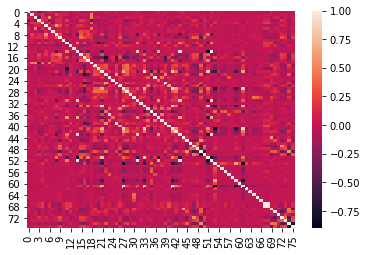

In [231]:
cov = np.corrcoef(np.hstack([all_X, y]).transpose())
heatmap(cov)

<AxesSubplot:>

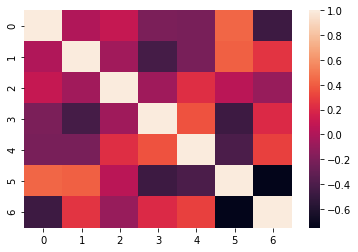

In [232]:
cov = np.corrcoef(y.transpose())
heatmap(cov)

In [236]:
pd.concat([all_X, y], axis=1).to_csv('dataset_ZavarzinE_filna_by_regression.csv', index=False)
